# Data Cleaning Notebook

## Objectives

- Handle missing values
- Drop or fix high-missing columns
- Correct data types
- Treat "None"/0 for categorical nulls

## Inputs

* outputs/datasets/collection/house_prices_records.csv

## Outputs

* Generate cleaned Train and Test sets, both saved under outputs/datasets/cleaned



---


# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/housing-prices/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/housing-prices'

---

# Load Collected data

In [4]:
import pandas as pd
df1_raw_path = "outputs/datasets/collection/house_prices_records.csv"
df1 = pd.read_csv(df1_raw_path)
df1.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


# Data Exploration

In Data Cleaning you are interested to check the distribution and shape of a variable with missing data.

In [5]:
df1.shape  # (rows, columns)
df1.info()
df1.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1422 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1315 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1225 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

,count,mean,std,min,25%,50%,75%,max
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
2ndFlrSF,1374.0,348.524017,438.865586,0.0,0.00,0.0,728.00,2065.0
BedroomAbvGr,1361.0,2.869214,0.820115,0.0,2.00,3.0,3.00,8.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
EnclosedPorch,136.0,25.330882,66.684115,0.0,0.00,0.0,0.00,286.0
GarageArea,1460.0,472.980137,213.804841,0.0,334.50,480.0,576.00,1418.0
GarageYrBlt,1379.0,1978.506164,24.689725,1900.0,1961.00,1980.0,2002.00,2010.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.0,1776.75,5642.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0


Distribtution of Numerical Features

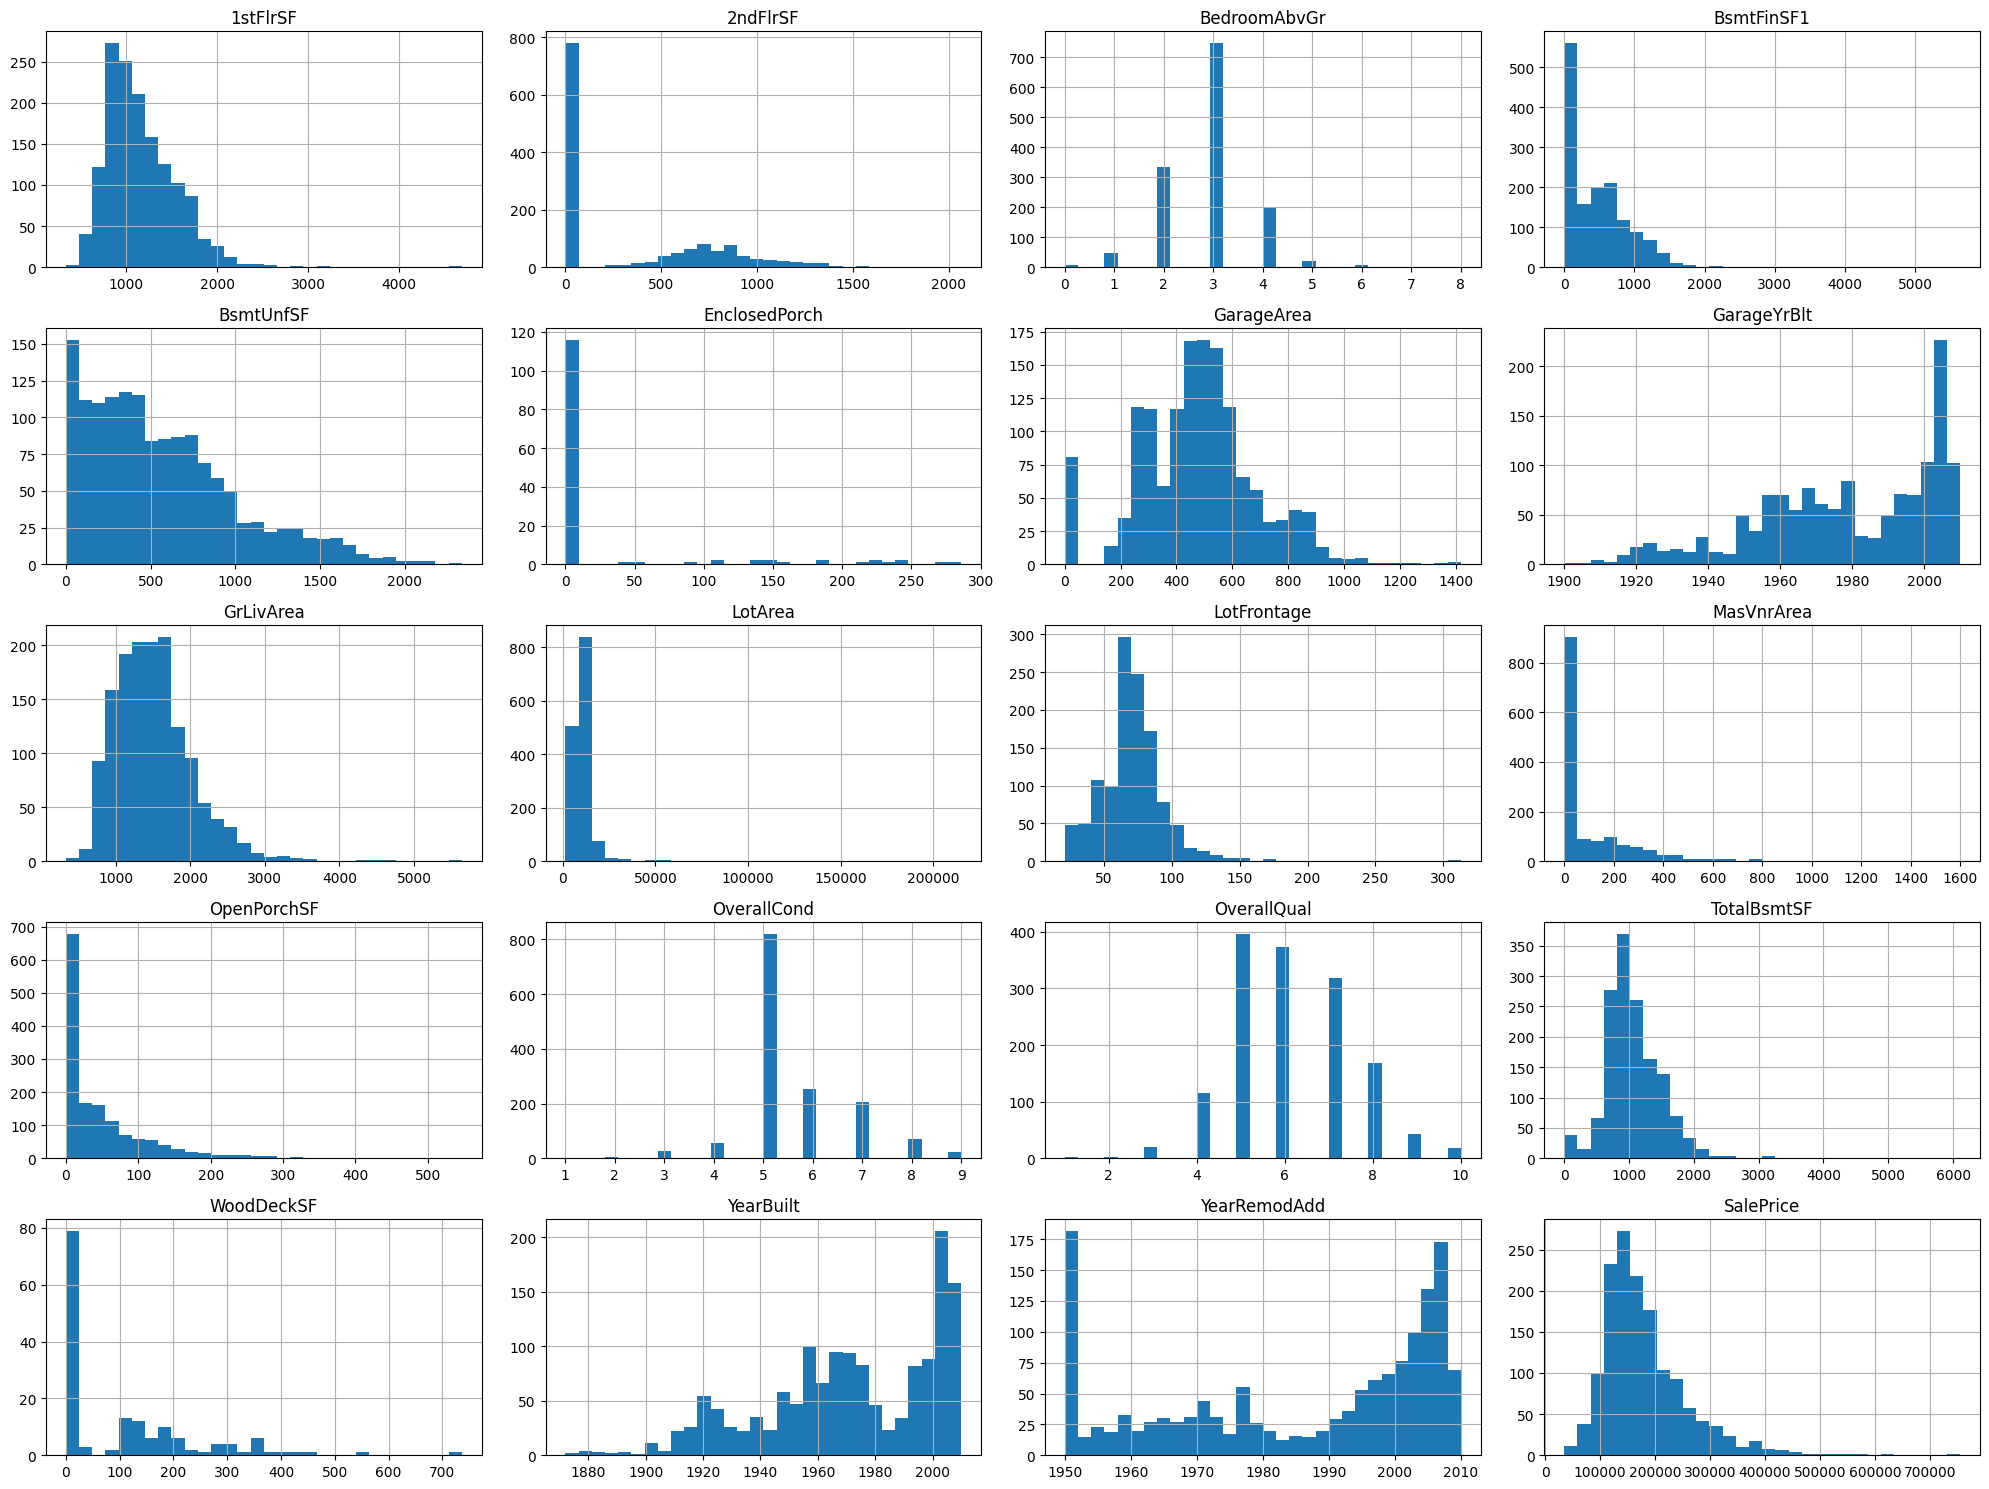

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df1.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
df1[numeric_cols].hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

# PPS Analysis

Power Predictive Score

In [7]:
import ppscore as pps
pps_matrix = pps.matrix(df1)
pps_matrix = pps_matrix[pps_matrix['y'] == 'SalePrice'].sort_values(by='ppscore', ascending=False)
pps_matrix[['x', 'ppscore']]

/home/cistudent/.local/lib/python3.12/site-packages/ppscore/calculation.py:201: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or is_categorical_dtype(series)
/home/cistudent/.local/lib/python3.12/site-packages/ppscore/calculation.py:201: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or is_categorical_dtype(series)
/home/cistudent/.local/lib/python3.12/site-packages/ppscore/calculation.py:201: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or is_categorical_dtype(series)
/home/cistudent/.local/lib/python3.12/site-packages/ppscore/calculation.py:201: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or is_categorical_dt

,x,ppscore
575,SalePrice,1.000000
455,OverallQual,0.440962
311,KitchenQual,0.261966
527,YearBuilt,0.198485
215,GarageArea,0.187993
239,GarageFinish,0.147870
551,YearRemodAdd,0.143284
263,GarageYrBlt,0.125638
287,GrLivArea,0.100166
143,BsmtFinType1,0.084660


Display at Heatmaps

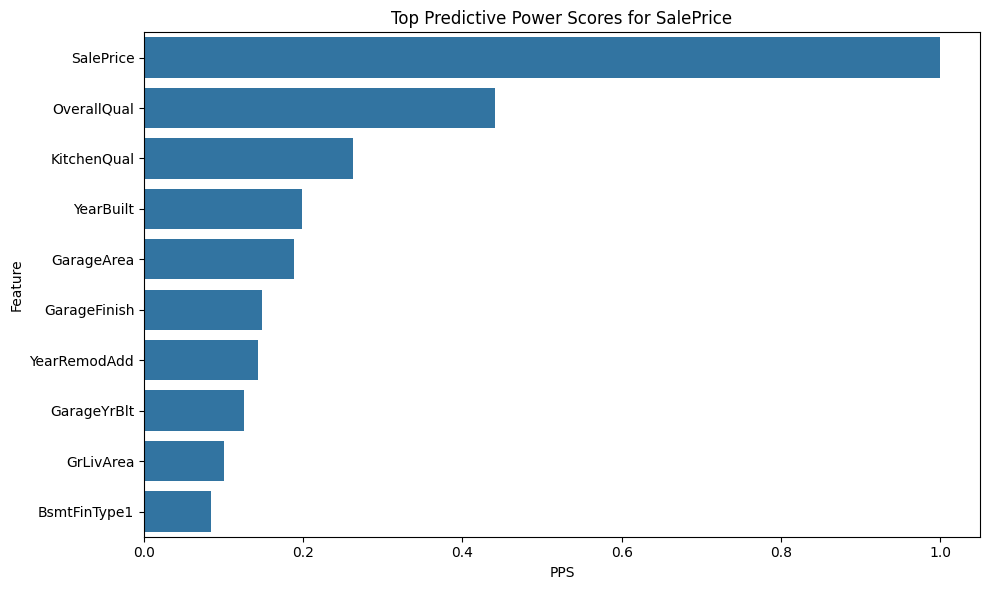

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

top_pps = pps_matrix[['x', 'ppscore']].head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='ppscore', y='x', data=top_pps)
plt.title('Top Predictive Power Scores for SalePrice')
plt.xlabel('PPS')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Data Cleaning

## Assessing Missing Data Levels

In the Correlation Discovery Notebook, we've seen missing values like:
| Column          | Missing % |
| --------------- | --------- |
| `EnclosedPorch` | \~90%     |
| `WoodDeckSF`    | \~89%     |
| `LotFrontage`   | \~18%     |
| `GarageFinish`  | \~16%     |
| `BsmtFinType1`  | \~10%     |
| `BedroomAbvGr`  | \~7%      |


In [9]:
# Drop columns with > 80% missing
df1.drop(columns=['EnclosedPorch', 'WoodDeckSF'], inplace=True)

Impute or Treat Missing Values

In [10]:
# Categorical: fill with 'None' if missing = not applicable
df1['GarageFinish'] = df1['GarageFinish'].fillna('None')
df1['BsmtFinType1'] = df1['BsmtFinType1'].fillna('None')
df1['BsmtExposure'] = df1['BsmtExposure'].fillna('None')

# Numerical: fill with 0 if missing = absence
df1['MasVnrArea'] = df1['MasVnrArea'].fillna(0)
df1['GarageYrBlt'] = df1['GarageYrBlt'].fillna(0)
df1['BsmtUnfSF'] = df1['BsmtUnfSF'].fillna(0)

# LotFrontage: impute by median (could group by neighborhood if available)
df1['LotFrontage'] = df1['LotFrontage'].fillna(df1['LotFrontage'].median())


## Dealing with Missing Data

### Data Cleaning Summary
We have successfully handled missing values for:

- Categorical fields like GarageFinish, BsmtExposure, etc.
- Numeric fields like GarageYrBlt, BsmtUnfSF, etc.
- Dropped or ignored high-missing-value fields like `['EnclosedPorchv', 'WoodDeckSF' ]`

In [11]:
# Re-check missing values
df1.isnull().sum().sort_values(ascending=False).head(10)

BedroomAbvGr    99
2ndFlrSF        86
1stFlrSF         0
BsmtExposure     0
BsmtFinSF1       0
BsmtFinType1     0
BsmtUnfSF        0
GarageArea       0
GarageFinish     0
GarageYrBlt      0
dtype: int64

### Final Data Cleaning
Handle `BedroomAbvGr` and `2ndFlrSF`
These are numeric, and the missing values probably mean:
- `BedroomAbvGr`: should not be missing. Fill with median or investigate rows if it's due to data error.
- `2ndFlrSF`: a missing value might indicate the house has no second floor → fill with 0.

In [12]:
df1['BedroomAbvGr'] = df1['BedroomAbvGr'].fillna(df1['BedroomAbvGr'].median())
df1['2ndFlrSF'] = df1['2ndFlrSF'].fillna(0)

### Split Train and Test Set

In [13]:
X = df1.drop(columns=['SalePrice'])  # Features
y = df1['SalePrice']                 # Target

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% for testing
    random_state=42      # for reproducibility
)

# Push cleaned data to Repo

In [16]:
import pandas as pd

# Combine features and target to save
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Save to separate files
train_df.to_csv("outputs/datasets/cleaned/train_set.csv", index=False)
test_df.to_csv("outputs/datasets/cleaned/test_set.csv", index=False)

Good job! Clear cell outputs

Well done! You can now push the changes to your GitHub Repo, using the Git commands (git add, git commit, git push)